# Ch 02 Q08

This exercise relates to the **College** data set, which can be found in the file **College.csv** on the book website.  
It contains a number of variables for 777 different universities and colleges in the US.  
The variables are:

- **Private** : Public/private indicator  
- **Apps** : Number of applications received  
- **Accept** : Number of applicants accepted  
- **Enroll** : Number of new students enrolled  
- **Top10perc** : New students from top 10 % of high school class  
- **Top25perc** : New students from top 25 % of high school class  
- **F.Undergrad** : Number of full-time undergraduates  
- **P.Undergrad** : Number of part-time undergraduates  
- **Outstate** : Out-of-state tuition  
- **Room.Board** : Room and board costs  
- **Books** : Estimated book costs  
- **Personal** : Estimated personal spending  
- **PhD** : Percent of faculty with Ph.D.s  
- **Terminal** : Percent of faculty with terminal degree  
- **S.F.Ratio** : Student/faculty ratio  
- **perc.alumni** : Percent of alumni who donate  
- **Expend** : Instructional expenditure per student  
- **Grad.Rate** : Graduation rate  

Before reading the data into Python, it can be viewed in Excel or a text editor.

---




### (a)
Use the `pd.read_csv()` function to read the data into Python.  
Call the loaded data **college**. Make sure that you have the directory set to the correct location for the data.


In [25]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

# 題目要求：用 pd.read_csv() 讀取官方的 College.csv
college = pd.read_csv('College.csv')

# 檢視前五列確認
print(college.head())


                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

### (b)
Look at the data used in the notebook by creating and running a new cell with just the code `college` in it.  
You should notice that the first column is just the name of each university with a column name such as `Unnamed: 0`.  
We don’t really want pandas to treat this as data.  
However, it may be handy to have these names for later.  
Try the following commands and similarly look at the resulting data frames:

```
college2 = pd.read_csv('College.csv', index_col=0)
college3 = college2.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college = college3
```

This has used the first column in the file as an index for the data frame.
This means that pandas has given each row a name corresponding to the appropriate university.
Note that the names of the colleges appear on the left of the table.
We also introduced a new python object above: a dictionary, which is specified by {key, value} pairs.

In [26]:
# (b) 將 'Unnamed: 0' 欄改名為 'College'，並設為索引
college = college.rename({'Unnamed: 0': 'College'}, axis=1)
college = college.set_index('College')

print(college.head())


                             Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific

### (c)
Use the `describe()` method of **college** to produce a numerical summary of the variables in the data set.


In [27]:
# 產生所有數值欄位的統計摘要
summary = college.describe()

# 顯示摘要
print(summary)

          Apps   Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
count   777.00   777.00  777.00     777.00     777.00       777.00   
mean   3001.64  2018.80  779.97      27.56      55.80      3699.91   
std    3870.20  2451.11  929.18      17.64      19.80      4850.42   
min      81.00    72.00   35.00       1.00       9.00       139.00   
25%     776.00   604.00  242.00      15.00      41.00       992.00   
50%    1558.00  1110.00  434.00      23.00      54.00      1707.00   
75%    3624.00  2424.00  902.00      35.00      69.00      4005.00   
max   48094.00 26330.00 6392.00      96.00     100.00     31643.00   

       P.Undergrad  Outstate  Room.Board   Books  Personal    PhD  Terminal  \
count       777.00    777.00      777.00  777.00    777.00 777.00    777.00   
mean        855.30  10440.67     4357.53  549.38   1340.64  72.66     79.70   
std        1522.43   4023.02     1096.70  165.11    677.07  16.33     14.72   
min           1.00   2340.00     1780.00   96.00    2

### (d)
Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `Top10perc`, `Apps`, `Enroll`.  
Recall that you can reference a list `c` of columns of a data frame `A` using `A[c]`.


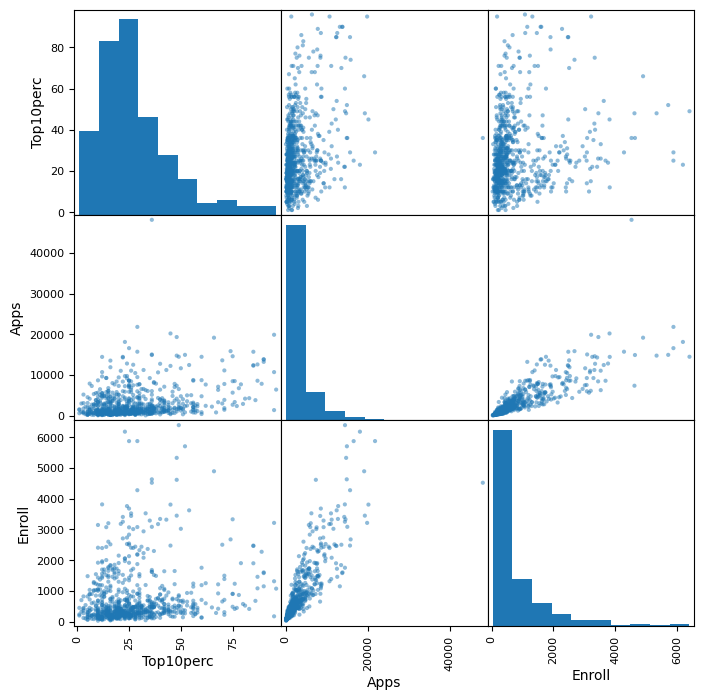

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 選取三個欄位
cols = ['Top10perc', 'Apps', 'Enroll']

# 繪製散佈圖矩陣
pd.plotting.scatter_matrix(college[cols], figsize=(8, 8), diagonal='hist')

# 顯示圖表
plt.show()

### (e)
Use the `boxplot()` method of **college** to produce side-by-side boxplots of `Outstate` versus `Private`.


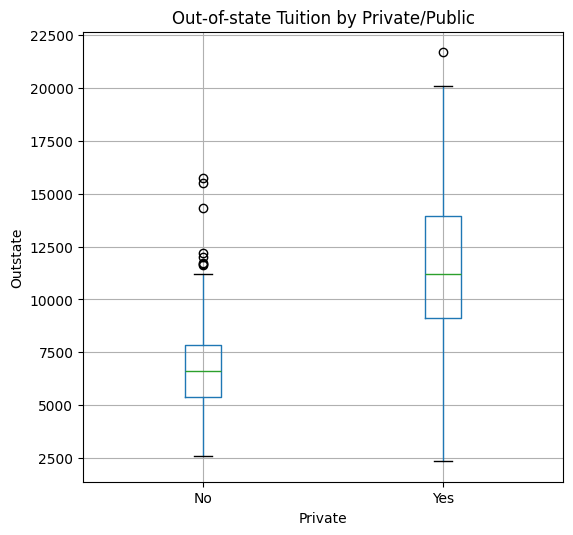

In [29]:
import matplotlib.pyplot as plt

# 以 Private 分組，畫出 Outstate 的盒鬚圖
college.boxplot(column='Outstate', by='Private', figsize=(6,6))

plt.title('Out-of-state Tuition by Private/Public')
plt.suptitle('')  # 移除 pandas 預設的副標題
plt.xlabel('Private')
plt.ylabel('Outstate')
plt.show()

### (f)
Create a new qualitative variable, called **Elite**, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.


Elite
No     699
Yes     78
Name: count, dtype: int64


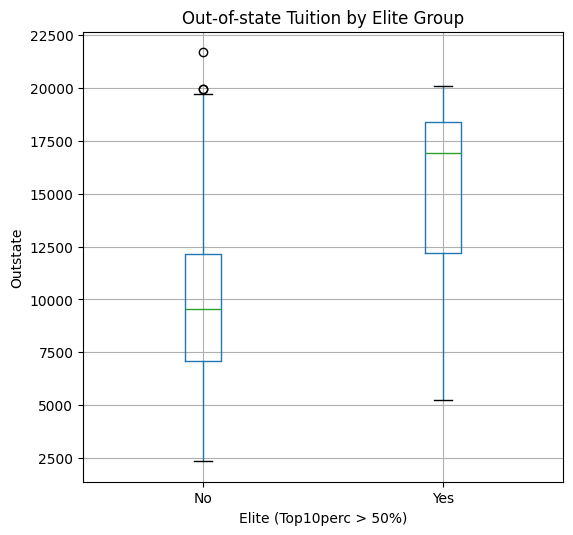

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 建立新欄位 Elite
college['Elite'] = pd.cut(college['Top10perc'],
                          bins=[-1, 50, 100],
                          labels=['No', 'Yes'])

# 檢視 Elite 分組的樣本數
print(college['Elite'].value_counts())

# 繪製 Outstate vs Elite 的盒鬚圖
college.boxplot(column='Outstate', by='Elite', figsize=(6,6))

plt.title('Out-of-state Tuition by Elite Group')
plt.suptitle('')  # 移除預設副標題
plt.xlabel('Elite (Top10perc > 50%)')
plt.ylabel('Outstate')
plt.show()

### (g)
Use the `plot.hist()` method of **college** to produce some histograms with differing numbers of bins for a few of the quantitative variables.  
The command `plt.subplots(2, 2)` may be useful: it divides the plot window into four regions so that four histograms can be made simultaneously.  
By changing the arguments to `plt.subplots()`, you can create other arrangements of subplots.


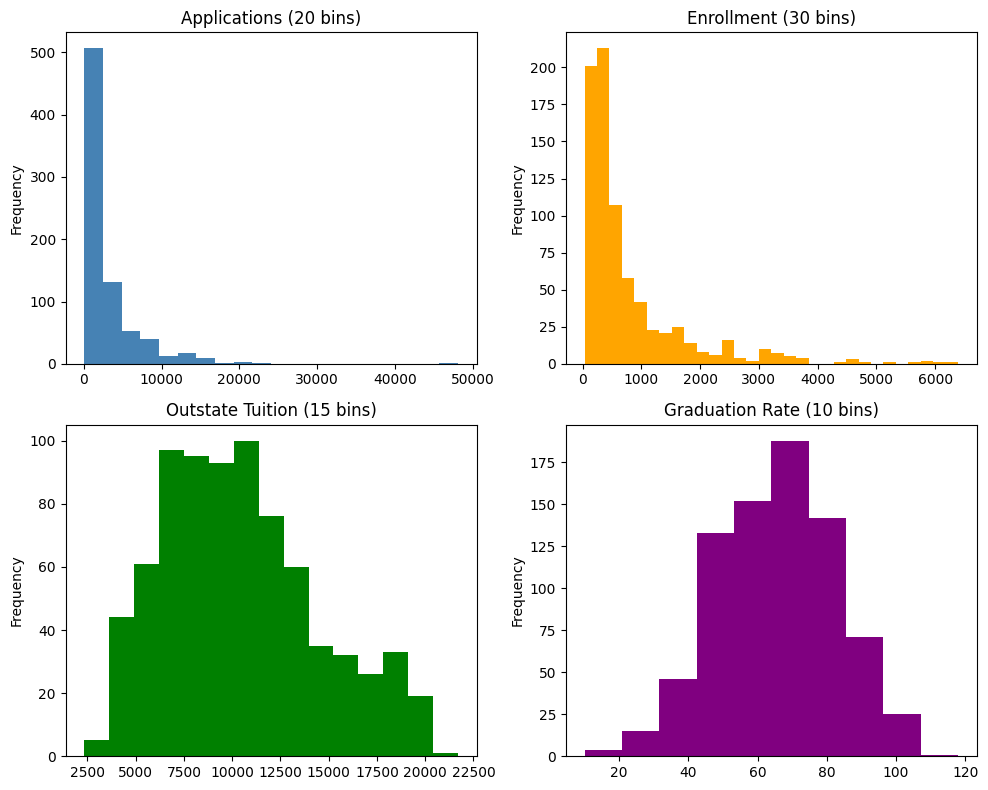

In [33]:

import matplotlib.pyplot as plt

# 建立 2x2 的子圖畫布
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 繪製四個不同欄位的直方圖，並設定不同的 bins
college['Apps'].plot.hist(bins=20, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Applications (20 bins)')

college['Enroll'].plot.hist(bins=30, ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Enrollment (30 bins)')

college['Outstate'].plot.hist(bins=15, ax=axs[1, 0], color='green')
axs[1, 0].set_title('Outstate Tuition (15 bins)')

college['Grad.Rate'].plot.hist(bins=10, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Graduation Rate (10 bins)')

# 調整子圖間距
plt.tight_layout()
plt.show()

### (h)
Use any of the other functions that we have seen in this chapter to produce some interesting graphical or numerical summaries of the data.  
Write a short summary of what you discover.


Average of Outstate Tuition (Top 5):
College
Bennington College                       21700
Massachusetts Institute of Technology    20100
Gettysburg College                       19964
Reed College                             19960
Princeton University                     19900
Name: Outstate, dtype: int64

Average of Outstate Tuition (Bottom 5):
College
Brigham Young University at Provo    2340
Peru State College                   2580
Wayne State College                  2700
Stockton College of New Jersey       3040
Arkansas Tech University             3460
Name: Outstate, dtype: int64


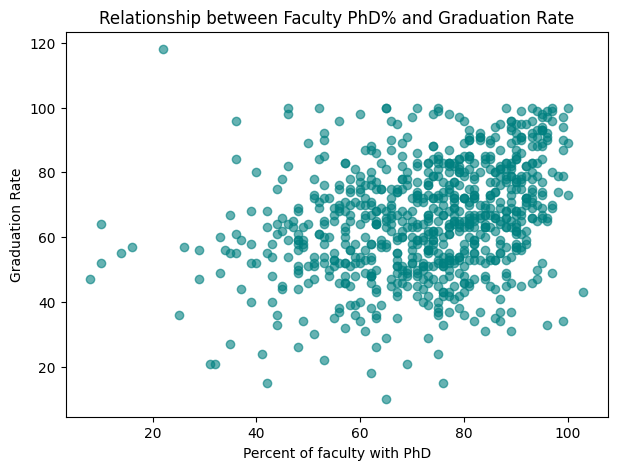

In [34]:
import matplotlib.pyplot as plt

# 1️⃣ 計算 Outstate 平均值的前五名與後五名學校
print("Average of Outstate Tuition (Top 5):")
print(college['Outstate'].nlargest(5))
print("\nAverage of Outstate Tuition (Bottom 5):")
print(college['Outstate'].nsmallest(5))

# 2️⃣ 視覺化：PhD vs Grad.Rate
plt.figure(figsize=(7,5))
plt.scatter(college['PhD'], college['Grad.Rate'], alpha=0.6, color='teal')
plt.xlabel('Percent of faculty with PhD')
plt.ylabel('Graduation Rate')
plt.title('Relationship between Faculty PhD% and Graduation Rate')
plt.show()

#### Findings
- **Out-of-state tuition**  
  The highest tuition colleges include Bennington College (21,700), MIT (20,100), Gettysburg College (19,964), Reed College (19,960), and Princeton University (19,900).  
  The lowest tuition colleges include Brigham Young University at Provo (2,340), Peru State College (2,580), Wayne State College (2,700), Stockton College of New Jersey (3,040), and Arkansas Tech University (3,460).  
  This shows a large variation in tuition levels across institutions.

- **Faculty PhD% and Graduation Rate**  
  The scatter plot reveals a generally positive relationship: colleges with a higher percentage of faculty holding PhDs tend to exhibit higher graduation rates.  
  This suggests that faculty qualifications may play a role in student completion rates.

